slope: [[ 5.07793064]]
intercept: [ 25.21002155]


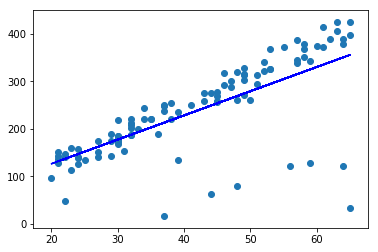

slope: [[ 5.07793064]]
intercept: [ 25.21002155]
0.878262470366
90 bullshit
123444
your regression object doesn't exist, or isn't name reg
can't make predictions to use in identifying outliers


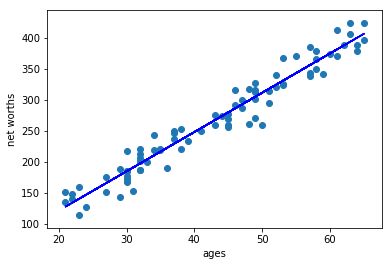

In [9]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle

#from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn import linear_model
### your code goes here!

reg = linear_model.LinearRegression()
reg.fit(ages_train, net_worths_train)

print "slope:", reg.coef_
print "intercept:", reg.intercept_

try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()
print "slope:", reg.coef_
print "intercept:", reg.intercept_
print reg.score(ages_test, net_worths_test)

### identify and remove the most outlier-y points
cleaned_data = []
print len(ages_train),"bullshit"
x=0
for x in range(90):
    new= ages[x], net_worths[x], predictions[x]-net_worths[x]
    cleaned_data.append(tuple(new))
cleaned_data.sort(key=lambda tup: tup[2])
cleaned_data = cleaned_data[:81]
try:
    print 123444
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"







### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"


In [4]:
print "slope:", reg.coef_
print "intercept:", reg.intercept_
print reg.score(ages_test, net_worths_test)

slope: [[ 6.36859481]]
intercept: [-6.91861069]
0.983189455396


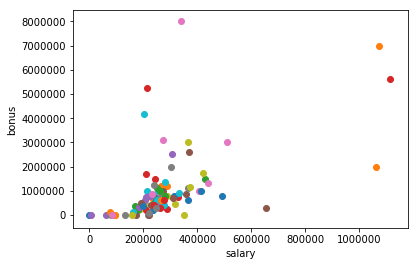

In [13]:
import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data_dict.pop("TOTAL",0)
data = featureFormat(data_dict, features)


### your code below

for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

[365788, 267102, 170941, 243293, 267093, 370448, 197091, 130724, 288589, 248546, 257486, 288542, 251654, 288558, 63744, 357091, 271442, 304110, 187922, 213625, 249201, 231330, 182245, 211788, 224305, 273746, 339288, 216582, 210500, 272880, 477, 269076, 428780, 211844, 206121, 174246, 510364, 365038, 365163, 162779, 236457, 1072321, 261516, 329078, 184899, 192008, 263413, 262663, 374125, 278601, 199157, 96840, 80818, 213999, 210692, 222093, 440698, 240189, 420636, 275101, 314288, 94941, 239502, 1111258, 6615, 655037, 404338, 259996, 317543, 201955, 248146, 76399, 262788, 261809, 248017, 229284, 231946, 221003, 158403, 250100, 492375, 1060932, 261879, 239671, 304588, 309946, 85274, 247338, 349487, 330546, 415189, 265214, 278601, 274975]
Max value element :  1111258
Min value element :  477
[[ 0.17997621  0.02911345  0.        ]]


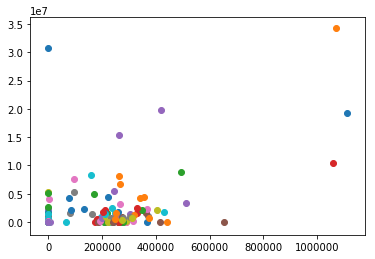

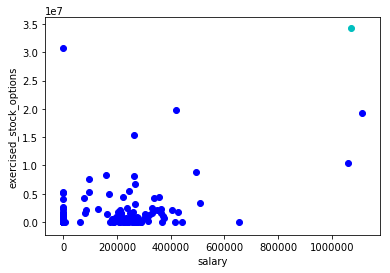

In [7]:
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit




def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)
ls = []
for people in data_dict:
    ls.append(data_dict[people]["salary"])
ls = [n for n in ls if n!= 'NaN']   
print ls
print "Max value element : ", max(ls)
print "Min value element : ", min(ls)

### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"


poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

## rescaling feature
from sklearn.preprocessing import MinMaxScaler
import numpy
scaler = MinMaxScaler()
scaler.fit(finance_features)
rescaled_feature = scaler.transform([[200000.,1000000.,0]])
print rescaled_feature

### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2, f3 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(data)
pred = kmeans.predict(data)


### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters2.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"